#Incidence du syndrome de la varicelle

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

Les données de l'incidence du syndrome de la varicelle sont disponibles du site Web du Réseau Sentinelles. Nous les récupérons sous forme d'un fichier en format CSV dont chaque ligne correspond à une semaine de la période demandée.

Afin d'éviter le re-téléchargement du jeu de donnée, et pour éviter tout problème de disparition / non accessibilité des données, nous faison une copie locale du fichier csv.


In [2]:
data_url = "https://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

On importe le jeu de donnée en local s'il n'existe pas.

In [3]:
import os
import urllib.request

data_local = "syndrome-varicelle.csv"
import urllib.request
if not os.path.exists(data_local):
    urllib.request.urlretrieve(data_url, data_local)

Voici l'explication des colonnes données [sur le site d'origine](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Nom de colonne | Libellé de colonne                                                                                                                |
|----------------|-----------------------------------------------------------------------------------------------------------------------------------|
| week           | Semaine calendaire (ISO 8601)                                                                                                     |
| indicator      | Code de l'indicateur de surveillance                                                                                              |
| inc            | Estimation de l'incidence de consultations en nombre de cas                                                                       |
| inc_low        | Estimation de la borne inférieure de l'IC95% du nombre de cas de consultation                                                     |
| inc_up         | Estimation de la borne supérieure de l'IC95% du nombre de cas de consultation                                                     |
| inc100         | Estimation du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants)                                   |
| inc100_low     | Estimation de la borne inférieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| inc100_up      | Estimation de la borne supérieure de l'IC95% du taux d'incidence du nombre de cas de consultation (en cas pour 100,000 habitants) |
| geo_insee      | Code de la zone géographique concernée (Code INSEE) http://www.insee.fr/fr/methodes/nomenclatures/cog/                            |
| geo_name       | Libellé de la zone géographique (ce libellé peut être modifié sans préavis)                                                       |

La première ligne du fichier CSV est un commentaire, que nous ignorons en précisant `skiprows=1`.

In [4]:
raw_data = pd.read_csv(data_local, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202115          7  13053     8413   17693      20          13   
1     202114          7  11249     8019   14479      17          12   
2     202113          7   9714     6289   13139      15          10   
3     202112          7  11520     8415   14625      17          12   
4     202111          7   9386     6678   12094      14          10   
5     202110          7   9056     6452   11660      14          10   
6     202109          7  10988     7938   14038      17          12   
7     202108          7  11281     8361   14201      17          13   
8     202107          7  13561    10315   16807      21          16   
9     202106          7  13401     9810   16992      20          15   
10    202105          7  12210     8988   15432      18          13   
11    202104          7  12026     8826   15226      18          13   
12    202103          7   8913     6375   11451      13           9   
13    202102          7   7795     5430   10160      12           8   
14    202101          7  10525     7750   13300      16          12   
15    202053          7  11978     8406   15550      18          13   
16    202052          7  12012     8285   15739      18          12   
17    202051          7  10564     7574   13554      16          11   
18    202050          7   7063     4744    9382      11           7   
19    202049          7   5026     3145    6907       8           5   
20    202048          7   6683     4312    9054      10           6   
21    202047          7   4999     2963    7035       8           5   
22    202046          7   3752     1963    5541       6           3   
23    202045          7   3696     2016    5376       6           3   
24    202044          7   4391     2375    6407       7           4   
25    202043          7   4376     2505    6247       7           4   
26    202042          7   4000     1979    6021       6           3   
27    202041          7   3961     2099    5823       6           3   
28    202040          7   2078      675    3481       3           1   
29    202039          7   1049      237    1861       2           1   
...      ...        ...    ...      ...     ...     ...         ...   
1555  199126          7  17608    11304   23912      31          20   
1556  199125          7  16169    10700   21638      28          18   
1557  199124          7  16171    10071   22271      28          17   
1558  199123          7  11947     7671   16223      21          13   
1559  199122          7  15452     9953   20951      27          17   
1560  199121          7  14903     8975   20831      26          16   
1561  199120          7  19053    12742   25364      34          23   
1562  199119          7  16739    11246   22232      29          19   
1563  199118          7  21385    13882   28888      38          25   
1564  199117          7  13462     8877   18047      24          16   
1565  199116          7  14857    10068   19646      26          18   
1566  199115          7  13975     9781   18169      25          18   
1567  199114          7  12265     7684   16846      22          14   
1568  199113          7   9567     6041   13093      17          11   
1569  199112          7  10864     7331   14397      19          13   
1570  199111          7  15574    11184   19964      27          19   
1571  199110          7  16643    11372   21914      29          20   
1572  199109          7  13741     8780   18702      24          15   
1573  199108          7  13289     8813   17765      23          15   
1574  199107          7  12337     8077   16597      22          15   
1575  199106          7  10877     7013   14741      19          12   
1576  199105          7  10442     6544   14340      18          11   
1577  199104          7   7913     4563   11263      14           8   
1578  199103          7  15387    10484   20290      27          18   
1579  199102          7  16277  

In [5]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

Il n'y a pas de données manquantes dans ce jeu de donnée.
Mais nous créons une copie de ce jeux de donnée afin d'éviter de travailler sur les données initiales (pour éviter toute corruption malencontreuse).

In [9]:
data_cpy = raw_data.copy()

Nous utilisons la bibliothèque `isoweek` afin de permettre à panda d\'interpréter les périodes données sous le format iso (AAAAWW).

In [12]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data_cpy['period'] = [convert_week(yw) for yw in data_cpy['week']]

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202115          7  13053     8413   17693      20          13   
1     202114          7  11249     8019   14479      17          12   
2     202113          7   9714     6289   13139      15          10   
3     202112          7  11520     8415   14625      17          12   
4     202111          7   9386     6678   12094      14          10   
5     202110          7   9056     6452   11660      14          10   
6     202109          7  10988     7938   14038      17          12   
7     202108          7  11281     8361   14201      17          13   
8     202107          7  13561    10315   16807      21          16   
9     202106          7  13401     9810   16992      20          15   
10    202105          7  12210     8988   15432      18          13   
11    202104          7  12026     8826   15226      18          13   
12    202103          7   8913     6375   11451      13           9   
13    202102          7   7795     5430   10160      12           8   
14    202101          7  10525     7750   13300      16          12   
15    202053          7  11978     8406   15550      18          13   
16    202052          7  12012     8285   15739      18          12   
17    202051          7  10564     7574   13554      16          11   
18    202050          7   7063     4744    9382      11           7   
19    202049          7   5026     3145    6907       8           5   
20    202048          7   6683     4312    9054      10           6   
21    202047          7   4999     2963    7035       8           5   
22    202046          7   3752     1963    5541       6           3   
23    202045          7   3696     2016    5376       6           3   
24    202044          7   4391     2375    6407       7           4   
25    202043          7   4376     2505    6247       7           4   
26    202042          7   4000     1979    6021       6           3   
27    202041          7   3961     2099    5823       6           3   
28    202040          7   2078      675    3481       3           1   
29    202039          7   1049      237    1861       2           1   
...      ...        ...    ...      ...     ...     ...         ...   
1555  199126          7  17608    11304   23912      31          20   
1556  199125          7  16169    10700   21638      28          18   
1557  199124          7  16171    10071   22271      28          17   
1558  199123          7  11947     7671   16223      21          13   
1559  199122          7  15452     9953   20951      27          17   
1560  199121          7  14903     8975   20831      26          16   
1561  199120          7  19053    12742   25364      34          23   
1562  199119          7  16739    11246   22232      29          19   
1563  199118          7  21385    13882   28888      38          25   
1564  199117          7  13462     8877   18047      24          16   
1565  199116          7  14857    10068   19646      26          18   
1566  199115          7  13975     9781   18169      25          18   
1567  199114          7  12265     7684   16846      22          14   
1568  199113          7   9567     6041   13093      17          11   
1569  199112          7  10864     7331   14397      19          13   
1570  199111          7  15574    11184   19964      27          19   
1571  199110          7  16643    11372   21914      29          20   
1572  199109          7  13741     8780   18702      24          15   
1573  199108          7  13289     8813   17765      23          15   
1574  199107          7  12337     8077   16597      22          15   
1575  199106          7  10877     7013   14741      19          12   
1576  199105          7  10442     6544   14340      18          11   
1577  199104          7   7913     4563   11263      14           8   
1578  199103          7  15387    10484   20290      27          18   
1579  199102          7  16277  

Nous définissons les périodes d'observation
comme nouvel index de notre jeux de données. Ceci en fait
une suite chronologique, ce qui sera pratique par la suite.

Deuxièmement, nous trions les points par période, dans
le sens chronologique.

In [13]:
sorted_data = data_cpy.set_index('period').sort_index()

Nous vérifions la cohérence des données. Entre la fin d'une période et
le début de la période qui suit, la différence temporelle doit être
zéro, ou au moins très faible. Nous laissons une "marge d'erreur"
d'une seconde.
Dans le cas où nous aurions une semaine manquante, ou un problème de date, la période correspondante serait remontée.

In [14]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Les périodes semblent être correctes.

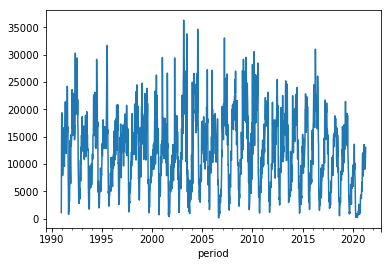

In [15]:
sorted_data['inc'].plot()

Données plus visible avec un zoom

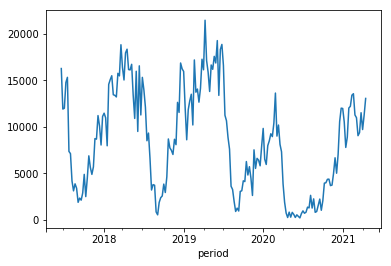

In [16]:
sorted_data['inc'][-200:].plot()

Nous choisissons de considérer une année débutant le 1er septembre, afin d'éviter les problèmes liés au nombre de semaine par année.
Les données débutant en décembre 1990, nous avons des données incomplètes : nous commençons donc en 1991.
Nous ne considérons pas non plus la période septembre 2020 - aout 2021 puisqu'elle n'est pas terminée.

In [39]:
first_september_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    2020)]
first_september_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

En partant de cette liste des semaines qui contiennent un 1er août, nous obtenons nos intervalles d'environ un an comme les périodes entre deux semaines adjacentes dans cette liste. Nous calculons les sommes des incidences hebdomadaires pour toutes ces périodes.

Nous vérifions également que ces périodes contiennent entre 51 et 52 semaines, pour nous protéger contre des éventuelles erreurs dans notre code.

In [40]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_september_week[:-1],
                        first_september_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

Les incidences annuelles :

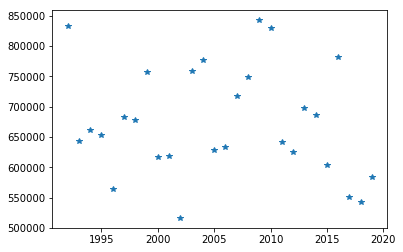

In [41]:
yearly_incidence.plot(style='*')

In [42]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64